In [3]:
import sys
sys.path.append('../')
from config import configuration
import sqlutilpy
config = configuration()
config.request_password()

 ·············


In [4]:
def onsky_plot(data,label='RRab',ff=None):
    if ff is None:
        ff=plt.figure(figsize=[15.,4.])
    plt.hist2d(data['l']-360.*(data['l']>180.),data['b'],bins=[200,50],norm=LogNorm(),
              cmap=plt.cm.viridis);

    plt.ylabel('Galactic latitude (deg)')
    plt.annotate(label,xy=(-65,3.5),fontsize=23,ha='right')
    plt.grid(zorder=0,color='k',lw=0.5,alpha=0.2)
    plt.xticks(-np.arange(-10,66,5));
    plt.xlim(11.,-66)
    plt.ylim(-10.4,5.4)
    plt.gca().set_aspect('equal')

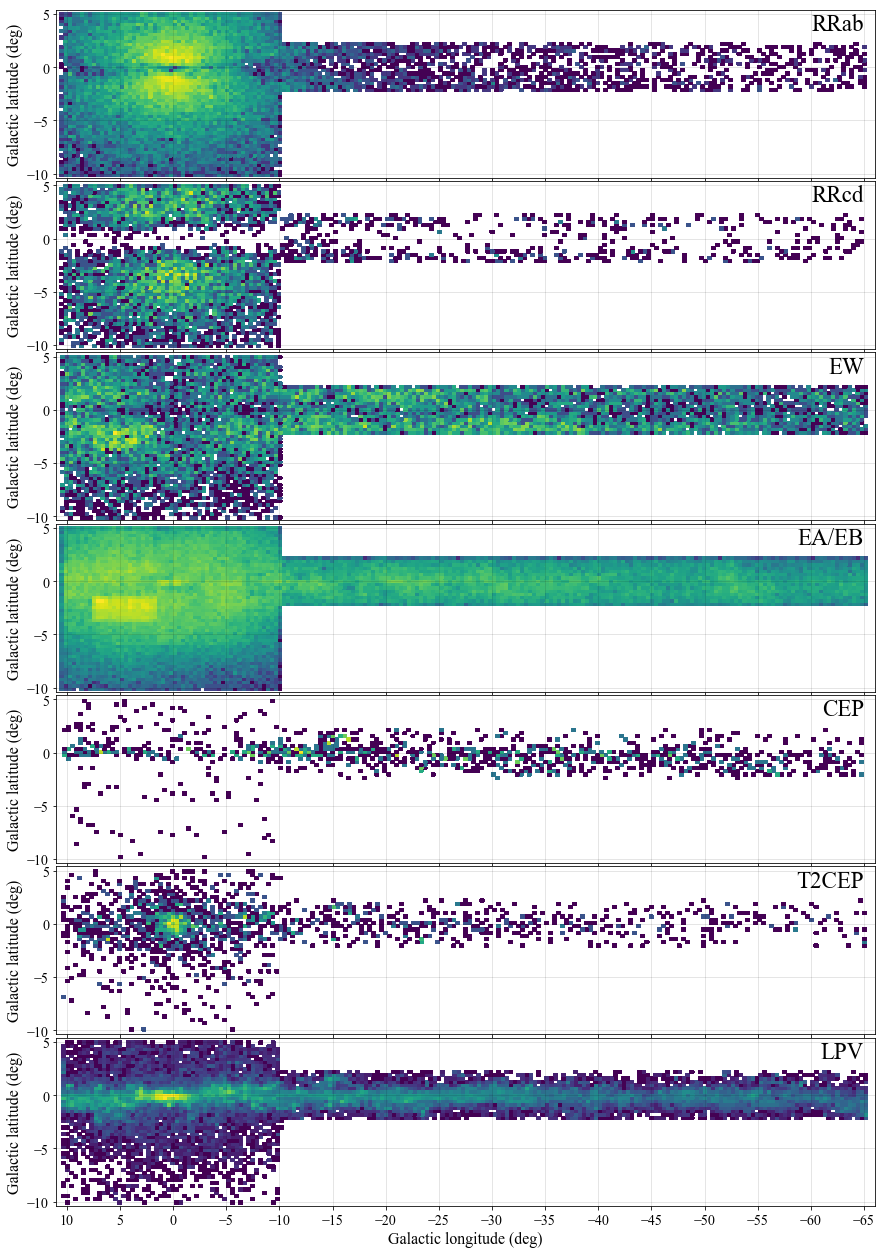

In [7]:
f,a=plt.subplots(7,1,figsize=[15.,22.],sharex=True)
plt.subplots_adjust(hspace=0.02)
for ii,cc in enumerate(['RRab','RRcd','EW','EA/EB','CEP','T2CEP','LPV']):
    plt.sca(a[ii])
    data = pd.DataFrame(
             sqlutilpy.get('''
             select * from jason_sanders.virac2_variables where prob>0.9 and class='%s' '''%cc,
                        **config.wsdb_kwargs)
           )
    onsky_plot(data,label=cc,ff=f)
plt.xlabel('Galactic longitude (deg)')
plt.savefig('onsky_distributions.pdf',bbox_inches='tight')